<a href="https://colab.research.google.com/github/balakrishnanvinchu/dnn-implementation/blob/main/dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:

# Load the Fashion-MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.8V86HZ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.8V86HZ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:

# Preprocessing function to normalize images
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

In [ ]:

# Prepare training and validation splits
train_size = int(0.8 * ds_info.splits['train'].num_examples)
val_size = ds_info.splits['train'].num_examples - train_size

ds_train = ds_train.shuffle(buffer_size=ds_info.splits['train'].num_examples)
train_data = ds_train.take(train_size).batch(128).prefetch(tf.data.AUTOTUNE)
val_data = ds_train.skip(train_size).take(val_size).batch(128).prefetch(tf.data.AUTOTUNE)
test_data = ds_test.batch(128).prefetch(tf.data.AUTOTUNE)

In [ ]:

# Build the Deep Feedforward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 images
    Dense(512, activation='relu'),     # First hidden layer with 512 units
    Dropout(0.2),                      # Dropout layer to reduce overfitting
    Dense(256, activation='relu'),     # Second hidden layer with 256 units
    Dropout(0.2),
    Dense(128, activation='relu'),     # Third hidden layer with 128 units
    Dropout(0.2),
    Dense(10, activation='softmax')    # Output layer with 10 units for classes
])
from tensorflow.keras.optimizers import SGD
# Compile the model with optimizer, loss function, and metrics
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9), # Example SGD with momentum
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Train the model on the training data with validation
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6130 - loss: 1.0947 - val_accuracy: 0.8347 - val_loss: 0.4599
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8222 - loss: 0.5040 - val_accuracy: 0.8543 - val_loss: 0.3995
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8422 - loss: 0.4366 - val_accuracy: 0.8660 - val_loss: 0.3651
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8513 - loss: 0.4103 - val_accuracy: 0.8661 - val_loss: 0.3636
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8613 - loss: 0.3870 - val_accuracy: 0.8836 - val_loss: 0.3234
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8684 - loss: 0.3682 - val_accuracy: 0.8844 - val_loss: 0.3147
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8684 - loss: 0.3627 - val_accuracy: 0.8847 - val_loss: 0.3179
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8740 - loss: 0.3436 - 

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8837 - loss: 0.3201

Test Accuracy: 0.8829


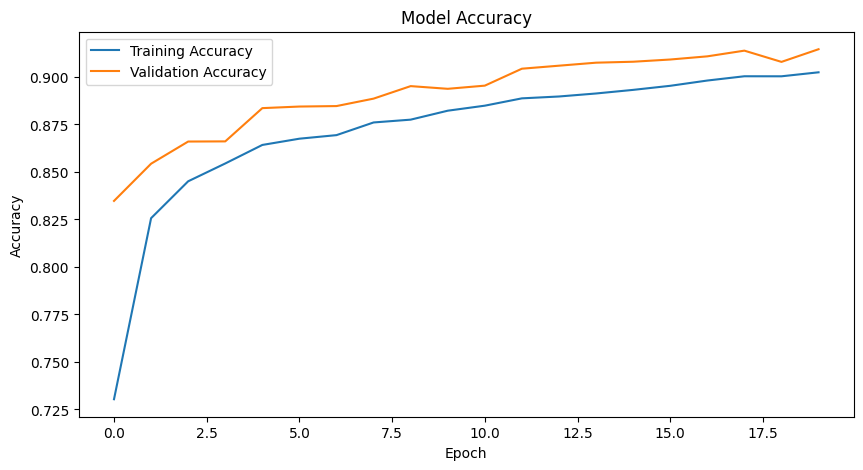

In [ ]:

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

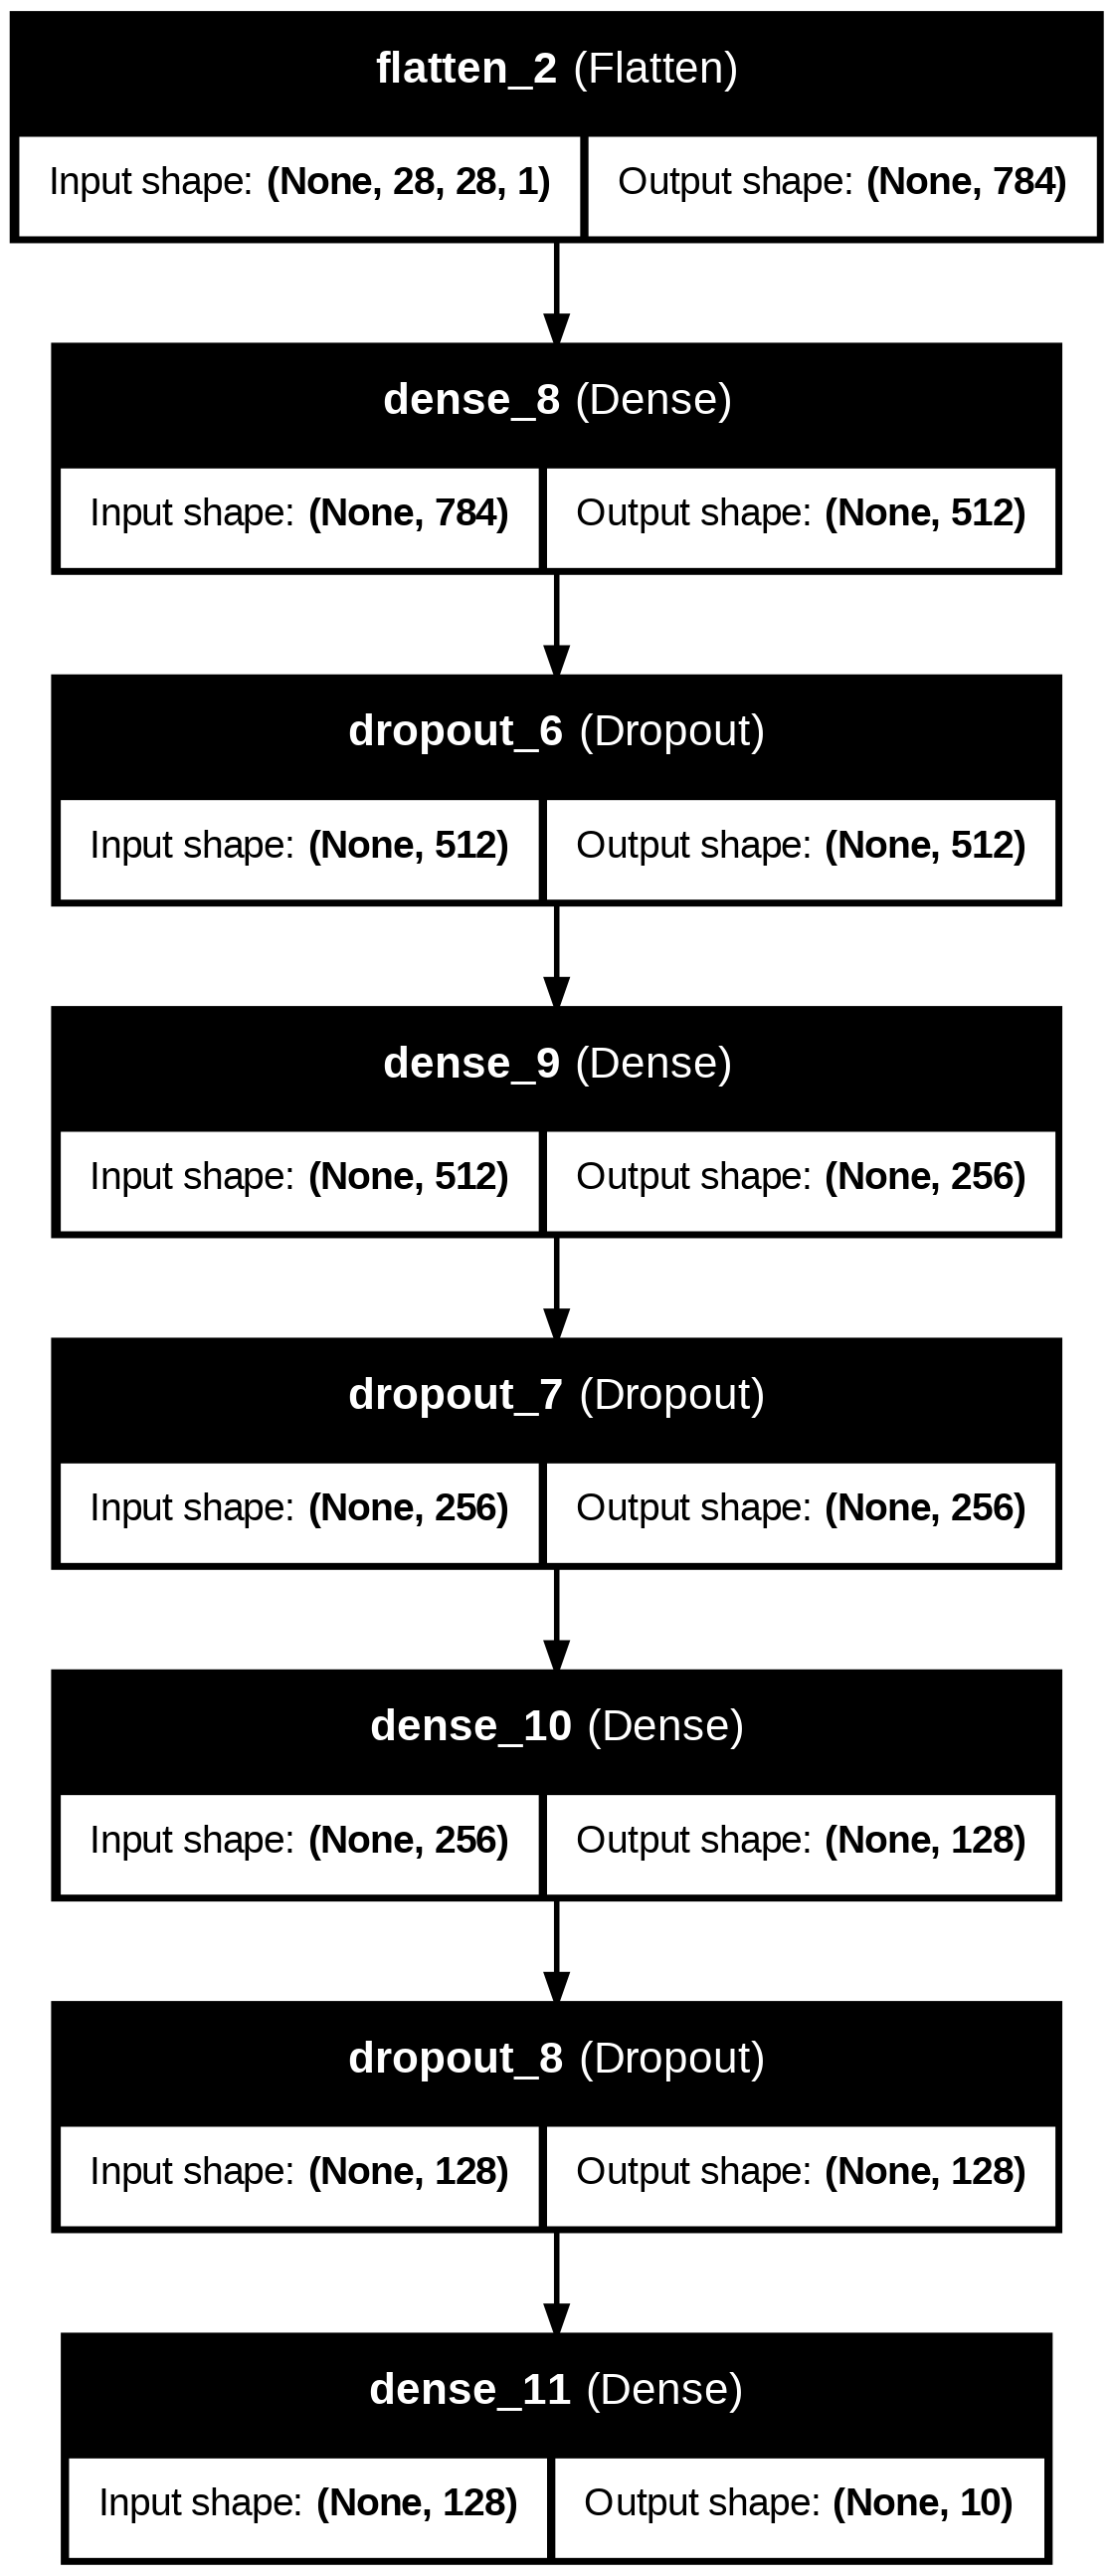

In [ ]:
# Import necessary library for plotting the model
from tensorflow.keras.utils import plot_model

# Build a simple model for demonstration
# (Assuming you have a 'model' variable defined from previous code)
# If not, you can use the model built in the previous code blocks.

# Plot the model and save it as a PNG file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Build a more complex Deep Feedforward Neural Network model
model_complex = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(1024, activation='relu'),  # Increased units
    Dropout(0.3),                     # Slightly higher dropout
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the complex model
model_complex.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9), # Example SGD with momentum
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Train the model on the training data with validation
history = model_complex.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.5407 - loss: 1.2613 - val_accuracy: 0.8281 - val_loss: 0.4850
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8029 - loss: 0.5480 - val_accuracy: 0.8494 - val_loss: 0.4064
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8359 - loss: 0.4680 - val_accuracy: 0.8572 - val_loss: 0.3838
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8488 - loss: 0.4285 - val_accuracy: 0.8752 - val_loss: 0.3453
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8553 - loss: 0.4018 - val_accuracy: 0.8750 - val_loss: 0.3376
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.8639 - loss: 0.3884 - val_accuracy: 0.8805 - val_loss: 0.3249
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.8650 - loss: 0.3696 - val_accuracy: 0.8860 - val_loss: 0.3074
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8701 - loss: 0.3656 - 

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8837 - loss: 0.3260

Test Accuracy: 0.8816


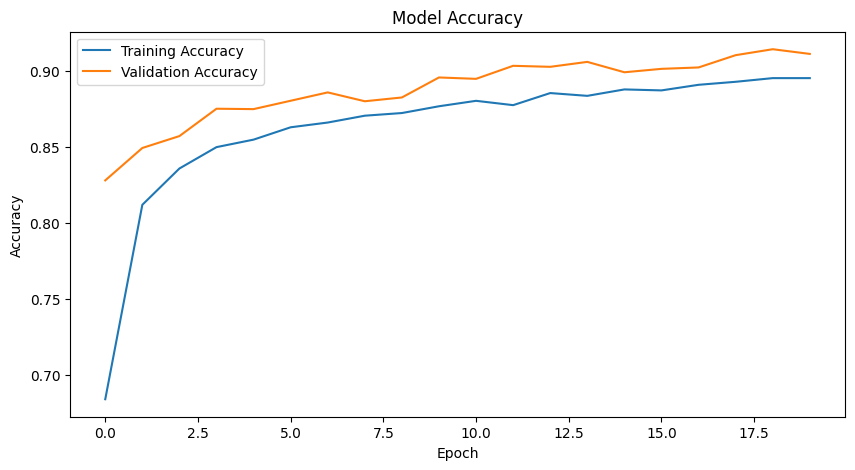

In [ ]:

# Evaluate the model on the test dataset
test_loss, test_acc = model_complex.evaluate(test_data)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Import necessary layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Build the CNN model
cnn_model = Sequential([
    # Convolutional layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer 1
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer 2
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the dense layers
    Flatten(),

    # Dense layers (similar to the feedforward network)
    Dense(128, activation='relu'),
    Dropout(0.5), # Added dropout for regularization
    Dense(10, activation='softmax') # Output layer
])

# Compile the CNN model with SGD with momentum
cnn_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9), # Use SGD with momentum
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

# Train the CNN model on the training data with validation
history_cnn_sgd = cnn_model.fit(
    train_data,
    epochs=20, # You can adjust the number of epochs
    validation_data=val_data,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 119ms/step - accuracy: 0.4894 - loss: 1.3713 - val_accuracy: 0.7982 - val_loss: 0.5285
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.7715 - loss: 0.6077 - val_accuracy: 0.8282 - val_loss: 0.4677
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.8074 - loss: 0.5225 - val_accuracy: 0.8414 - val_loss: 0.4315
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.8231 - loss: 0.4813 - val_accuracy: 0.8623 - val_loss: 0.3767
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - accuracy: 0.8347 - loss: 0.4537 - val_accuracy: 0.8668 - val_loss: 0.3533
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.8463 - loss: 0.4233 - val_accuracy: 0.8689 - val_loss: 0.3457
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.8516 - loss: 0.4087 - val_accuracy: 0.8775 - val_loss: 0.3244
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - accuracy: 0.8576 - loss: 0

In [ ]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)

In [ ]:
visualkeras.layered_view(model)

NameError: name 'visualkeras' is not defined